# Função de Bessel de primeira espécie em Python
A equação de Bessel de índice $\nu$ é a EDO,

<p>$$\normalsize \\ (1)\ \hspace{15pt} x^2y''+xy'+(x^2-\nu^2)y=0$$
    
<p>onde $\nu$ é um número real e,</p> 

   <p>$$y = J_\nu(x)$$</p>
    
<p>Cuja a solução é dada pela expressão,</p>

<p>$$\normalsize \\ (2)\ \hspace{15pt} J_\nu(x)={\large\displaystyle \sum_{\small k=0}^{\small\infty}\frac{(-1)^k}{k!\Gamma(k+\nu+1)}\left ( \frac{x}{2} \right)^{\nu+2k}}$$</p>

<p>Esta função é chamada de função de Bessel de $1^{a}$ espécie de índice $\nu$ e denotada por $ J_\nu(x)$.</p>

<p>Em particular,</p>

<p>$\ J_0(x)={\large\displaystyle \sum_{\small k=0}^{\small\infty}\frac{(-1)^k}{(k!)^{2}}\left ( \frac{x}{2} \right)^{2k}}, \hspace{20pt}
J_1(x) = {\large\displaystyle \sum_{\small k=0}^{\small\infty}\frac{(-1)^k}{k!(k + 1)!}\left ( \frac{x}{2} \right)^{2k + 1}}, \hspace{20pt}
J_2(x) = {\large\displaystyle \sum_{\small k=0}^{\small\infty}\frac{(-1)^k}{k!(k + 2)!}\left ( \frac{x}{2} \right)^{2k + 2}}, \hspace{20pt} etc.$</p>

## Importação de biblitecas

In [449]:
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import numpy as np

In [450]:
%matplotlib inline
%config InlineBackend.rc={'figure.figsize': (12, 7)}

## Entrada de dados

In [451]:
dados = pd.read_csv("dados.csv")
df = pd.DataFrame(dados)

In [452]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
entrada,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0


## Função Fatorial

In [453]:
def fatorial(n):
    if(n == 0):
        return 1
    else:
        return n*fatorial(n - 1)

## Formatação dos dados impressos - Latex

In [454]:
def printmd(string):
    display(Markdown(string))
    #display(Latex(string))

f = sym.symbols('$_{0}$')
g = sym.symbols('$_{1}$')
h = sym.symbols('$_{2}$')

## Definindo as Funções de Bessel

In [455]:
def J0(x):
    k = 0
    soma = 0
    termo = 1
    while(1.0e-4 <= termo):
        termo = pow(x/2, (2*k))/(fatorial(k)*fatorial(k))
        soma += pow(-1, k)*termo
        k += 1
    return soma

In [456]:
def J1(x):
    k = 0
    soma = 0
    termo = 1
    while(1.0e-4 <= termo):
        termo = pow(x/2, (2*k + 1))/(fatorial(k)*fatorial(k + 1))
        soma += pow(-1, k)*termo
        k += 1
    return soma

In [457]:
def J2(x):
    k = 0
    soma = 0
    termo = 1
    while(1.0e-4 <= termo):
        termo = pow(x/2, (2*k + 2))/(fatorial(k)*fatorial(k + 2))
        soma += pow(-1, k)*termo
        k += 1
    return soma

## Amplitude da função de Bessel

In [458]:
y = np.sqrt(2/(np.pi*df['entrada']))

In [459]:
z = -np.sqrt(2/(np.pi*df['entrada']))

## Resultados obtidos

In [460]:
l =[]
m = []
n = []
o = []
p = [l, m, n, o]
for i in df['entrada']:
    l.append(i)
    m.append(J0(i))
    n.append(J1(i))
    o.append(J2(i))
    #printmd('**$J${}({}):  {: 0.5f} $|$ $J${}({}):  {: 0.5f} $|$ $J${}({}):  {: 0.5f}**'.format(f, i, J0(i), g, i, J1(i), h, i, J2(i)))
    a = pd.DataFrame(p)
a = a.rename(index={0:"x", 1:"J0(x)", 2: "J1(x)", 3:"J2(x)"}).T
print(a.head(60))



       x     J0(x)     J1(x)     J2(x)
0    0.0  1.000000  0.000000  0.000000
1    0.5  0.938470  0.242269  0.030604
2    1.0  0.765198  0.440050  0.114903
3    1.5  0.511828  0.557937  0.232088
4    2.0  0.223889  0.576725  0.352836
5    2.5 -0.048383  0.497094  0.446058
6    3.0 -0.260052  0.339061  0.486092
7    3.5 -0.380132  0.137377  0.458633
8    4.0 -0.397148 -0.066043  0.364126
9    4.5 -0.320543 -0.231057  0.217850
10   5.0 -0.177596 -0.327581  0.046571
11   5.5 -0.006841 -0.341438 -0.117318
12   6.0  0.150644 -0.276679 -0.242872
13   6.5  0.260095 -0.153843 -0.307431
14   7.0  0.300083 -0.004682 -0.301420
15   7.5  0.266338  0.135254 -0.230272
16   8.0  0.171651  0.234634 -0.112992
17   8.5  0.041943  0.273123  0.022321
18   9.0 -0.090335  0.245318  0.144849
19   9.5 -0.193928  0.161262  0.227878
20  10.0 -0.245931  0.043474  0.254626
21  10.5 -0.236650 -0.078843  0.221631
22  11.0 -0.171189 -0.176788  0.139047
23  11.5 -0.067649 -0.228377  0.027932
24  12.0  0.047687 -0.223

## Plotando os resultados obtidos

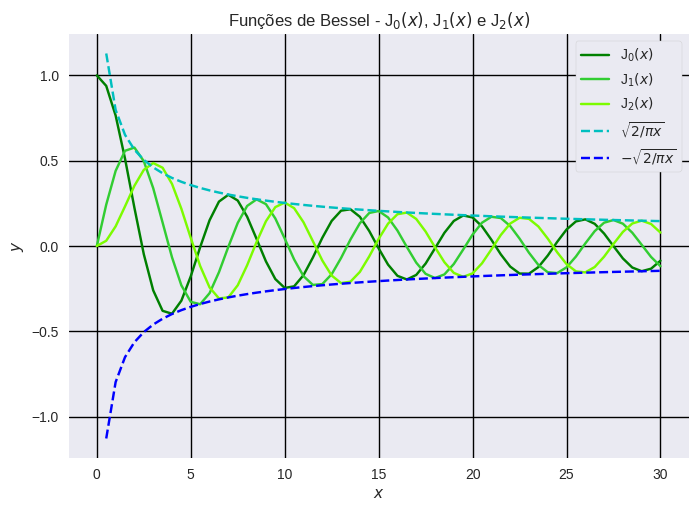

In [462]:
plt.title('Funções de Bessel - J$_{0}(x)$, J$_{1}(x)$ e J$_{2}(x)$')
plt.plot(df['entrada'], m, 'g', label = 'J$_{0}(x)$')
plt.plot(df['entrada'], n, 'limegreen', label = 'J$_{1}(x)$')
plt.plot(df['entrada'], o, 'lawngreen', label = 'J$_{2}(x)$')
plt.plot(df['entrada'], y, 'c--', label = '$\sqrt{2 / \pi x}$')
plt.plot(df['entrada'], z, 'b--', label = '$ - \sqrt{2 / \pi x}$')
plt.legend(framealpha=1, frameon=True)
plt.grid(color = 'black')
plt.style.use('seaborn')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()